In [1]:
# Required Packages
import pandas as pd
import numpy as np
import json

# Plots

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Table of Contents

* [Los Angeles County Restaurant and Market Violations and Inspections](#Los-Angeles-County-Restaurant-and-Market-Violations-and-Inspections)
* [Loading Datasets](#Loading-Datasets)
    * [Violations Dataset](#Violations-Dataset)
    * [Inspection Result Dataset](#Inspection-Result-Dataset)
    * [Merged Dataset](#Merged-Dataset)
* [Initial Analysis](#Initial-Analysis)
    * [Dates with the most Number of Violations](#Dates-with-the-most-Number-of-Violations)
    * [Restaurant Owners with the most number of Violations](#Restaurant-Owners-with-the-most-number-of-Violations)
    * [Facilities with the Most Violations](#Facilities-with-the-Most-Violations)
    * [Programs with the Most Violations](#Programs-with-the-Most-Violations)
    * [Cities with the Most Violations](#Cities-with-the-Most-Violations)
    * [Service Description](#Service-Description)
    * [The Number of Violations by High-Score and Low-Score Facilities](#The-Number-of-Violations-by-High-Score-and-Low-Score-Facilities)
    * [The Number of Violations by Each Grades](#The-Number-of-Violations-by-Each-Grades)
    * [Violation Status](#Violation-Status)
    * [The Most Described Violations](#The-Most-Described-Violations)
    * [Program Element Description](#Program-Element-Description)
    * [A Deeper look into Violation by each Facility](#A-Deeper-look-into-Violation-by-each-Facility)

# Los Angeles County Restaurant and Market Violations and Inspections


In this article, we use a dataset contains Environmental Health Violations for Restaurants and Markets in Los Angeles County. This dataset can be found [here](https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-VIOLATION/8jyd-4pv9) and [here](https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-INSPECTIO/6ni6-h5kp).

Los Angeles County Environmental Health is responsible for checking food violations for all unincorporated areas and 85 of the 88 cities in the County. This dataset does not include Pasadena, Long Beach or Vernon (each has its own city health department).

# Loading Datasets

The data that has been processed before.

In [2]:
Violations_df = pd.read_csv('Data/LA/Clean_Violations_df.csv')
Inspections_df = pd.read_csv('Data/LA/Clean_Inspections_df.csv')
Data  = pd.read_csv('Data/LA/Data_Inspections_Violations_df.csv')
Violation_Dictionary_df  = pd.read_csv('Data/LA/Violation_Dictionary_df.csv')

## Violations Dataset

Each row represents one health code violation. All rows with the same Serial Number are part of the same inspection. The Serial Number is the primary key to review the inspection grade (Inspection Result dataset)

In [3]:
Violations_df.head().style.hide_index()

## Inspection Result Dataset

Each row represents one inspection result. The Serial Number is the primary key to access/review the violations (Violations Dataset) associated with a particular inspection.

In [4]:
Inspections_df.head().style.hide_index()

## Merged Dataset

In [5]:
Data.head().style.hide_index()

# Exploratory Data Analysis

First off, note that our dataset has the following columns.

In [6]:
Data.columns

Index(['Activity Date', 'Owner ID', 'Owner Name', 'Facility ID',
       'Facility Name', 'Record ID', 'Program Name', 'Program Status',
       'Program Element (PE)', 'Facility Address', 'Facility City',
       'Facility State', 'Facility Zip', 'Service Code', 'Service Description',
       'Score', 'Grade', 'Serial Number', 'Employee ID', 'Location',
       'Violation Status', 'Violation Code', 'Violation Description', 'Points',
       'PE_Type', 'PE_Seats', 'PE_Risk'],
      dtype='object')

## Dates with the most Number of Violations

In [7]:
Activity = pd.DataFrame(Data.groupby('Activity Date')['Violation Code'].count())
Activity.columns = ['Count']
Activity[Activity['Count'] >2400 ].T

Activity Date  2018-01-16  2018-03-21  2018-07-17  2018-07-24  2018-07-25  \
Count                2467        2401        2560        2501        2406   

Activity Date  2018-08-08  2018-09-18  2018-09-25  2018-09-26  2018-10-03  \
Count                2497        2505        2605        2546        2653   

Activity Date  ...  2019-08-28  2019-09-10  2019-09-18  2019-09-24  \
Count          ...        2439        2487        2470        2728   

Activity Date  2019-09-25  2019-10-09  2019-10-29  2019-11-19  2019-11-20  \
Count                2410        2628        2439        2421        2434   

Activity Date  2019-12-04  
Count                2465  

[1 rows x 39 columns]

In [8]:
Activity[Activity['Count'] == Activity.max()[0]].index[0]

'2019-01-23'

We can see that the highest number of violations happened on **January 23, 2019**.

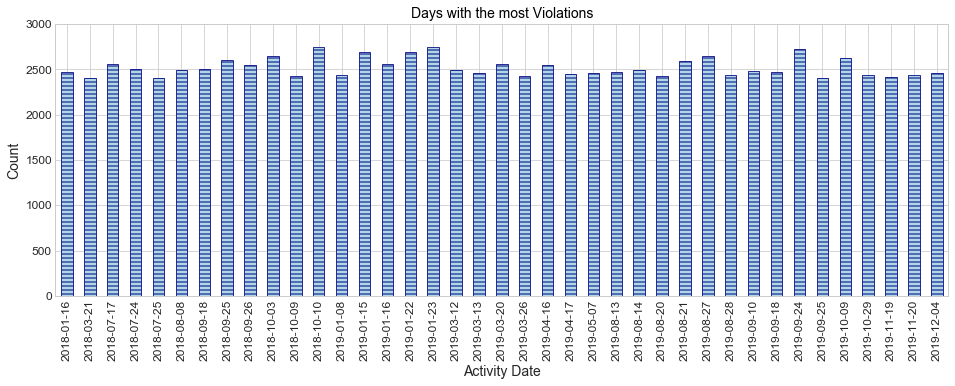

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Activity[Activity['Count'] >2400 ].plot.bar(rot=90,ax=ax, legend=False,
                                                color=sns.light_palette('lightBlue', reverse=True), edgecolor='Navy',
                                                hatch = '---')
_ = ax.set_title('Days with the most Violations')
_ = ax.set_ylim([0, 3e3])
_ = ax.set_xlabel('Activity Date')
_ = ax.set_ylabel('Count')

In particular, for the hightest number of violations, we have

In [10]:
Activity_Violation = pd.DataFrame(Data.groupby(['Activity Date','Violation Code'])['Violation Code'].count())
Activity_Violation.columns = ['Count']
list = Activity[Activity['Count'] == Activity['Count'].max()].index
temp = Activity_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Activity Date')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F004  F005  F006  F007  F008  F009  F011  F013  F014  F016   
Count             11    11   115   105    15    27     1    13   114     5   

                ...    35    36    37    38    39    40    41    42    43  \
Violation Code  ...  F047  F048  F049  F050  F052  F053  F054  F055  F057   
Count           ...     4    23    33    14    35    41     7    21     2   

                  44  
Violation Code  F058  
Count              4  

[2 rows x 45 columns]

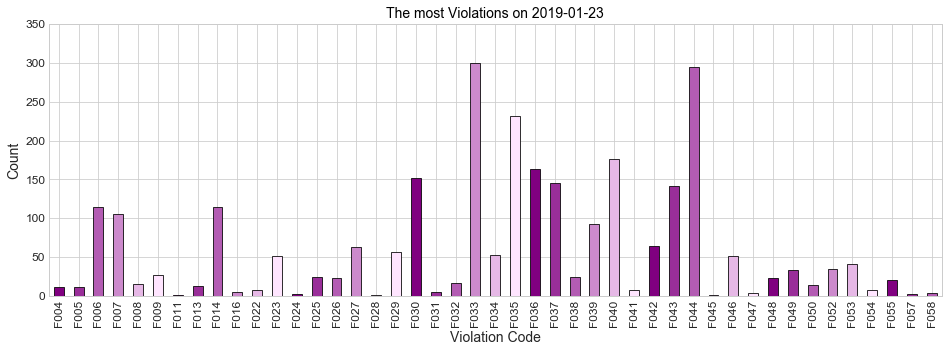

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.light_palette("purple", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations on %s' % list.tolist()[0])
_ = ax.set_ylim([0, 350])
# _ = ax.set_yscale('log')
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations on this day are:

In [12]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Restaurant Owners with the most number of Violations

In [13]:
Owners= pd.DataFrame(Data[Data['Owner ID'].isna()==False].groupby('Owner ID')['Violation Code'].count())
Owners.columns = ['Count']
Owners=Owners.sort_values(by='Count', ascending=False)
Owners[Owners['Count'] >1.5e3].T

Owner ID  OW0029458  OW0038181  OW0033938  OW0010868  OW0012108  OW0033717  \
Count          7348       5440       3461       2803       2469       2213   

Owner ID  OW0004937  OW0034460  OW0007608  OW0027458  OW0038850  OW0012926  \
Count          2210       2143       2130       2076       1847       1817   

Owner ID  OW0033830  OW0009661  OW0038349  OW0002029  
Count          1624       1607       1574       1542

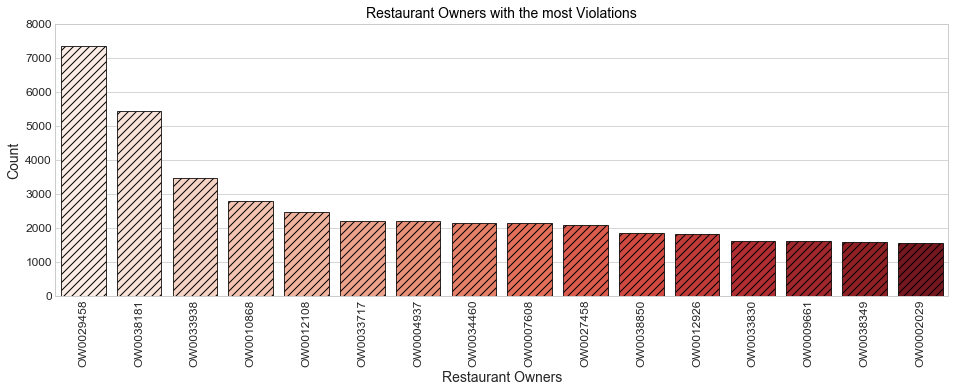

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)

_ = sns.barplot(ax = ax, x='Owner ID', y='Count', palette='Reds',
                edgecolor='k',  hatch="///", data= Owners[Owners['Count'] >1.5e3].reset_index())
# _ = Owners[Owners['Count'] >1.5e3].plot.bar(rot=90,ax=ax, legend=False, color="#34495e", edgecolor="k")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
_ = ax.set_title('Restaurant Owners with the most Violations')
_ = ax.set_ylim([0, 8e3])
_ = ax.set_xlabel('Restaurant Owners')
_ = ax.set_ylabel('Count')

In particular,

In [15]:
Owners_Violation  = pd.DataFrame(Data.groupby(['Owner ID','Violation Code'])['Violation Code'].count())
Owners_Violation.columns = ['Count']
list = Owners[Owners['Count'] == Owners['Count'].max()].index
temp = Owners_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Owner ID')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F001  F004  F005  F006  F007  F008  F009  F011  F013  F014   
Count              7    10    17   185   303    14     5     3    22   169   

                ...    37    38    39    40    41    42    43    44    45  \
Violation Code  ...  F048  F049  F050  F052  F053  F054  F055  F058  W019   
Count           ...    34    70     7    20    95     3    31     9     1   

                  46  
Violation Code  W020  
Count              1  

[2 rows x 47 columns]

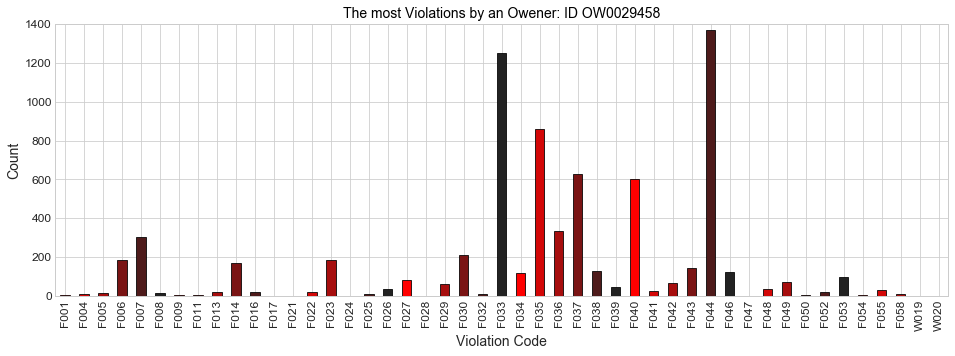

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.dark_palette("red", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by an Owener: ID %s' % list.tolist()[0])
_ = ax.set_ylim([0, 1.4e3])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations by this owner are:

In [17]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Facilities with the Most Violations

In [18]:
Facilities = pd.DataFrame(Data[Data['Facility Name'].isna()==False].groupby('Facility Name')['Violation Code'].count())
Facilities.columns = ['Count']
Facilities = Facilities.sort_values(by='Count', ascending=False)
Facilities[Facilities['Count'] >6e2].T

Facility Name  SUBWAY  DOMINO'S PIZZA  WABA GRILL  EL SUPER  EL POLLO LOCO  \
Count            1819            1524        1523      1479           1452   

Facility Name  DODGER STADIUM  JERSEY MIKE'S SUBS  WHOLE FOODS MARKET  \
Count                    1402                1382                1260   

Facility Name  THE COFFEE BEAN & TEA LEAF  7-ELEVEN  ...  \
Count                                1151       990  ...   

Facility Name  SPROUTS FARMERS MARKET  KENTUCKY FRIED CHICKEN  \
Count                             816                     802   

Facility Name  ONO HAWAIIAN BBQ  LA COLISEUM  YOGURTLAND  WINGSTOP  \
Count                       792          731         731       657   

Facility Name  BASKIN ROBBINS  WETZEL'S PRETZELS  MCDONALD'S  \
Count                     651                645         605   

Facility Name  SUPERIOR SUPER WAREHOUSE  
Count                               604  

[1 rows x 26 columns]

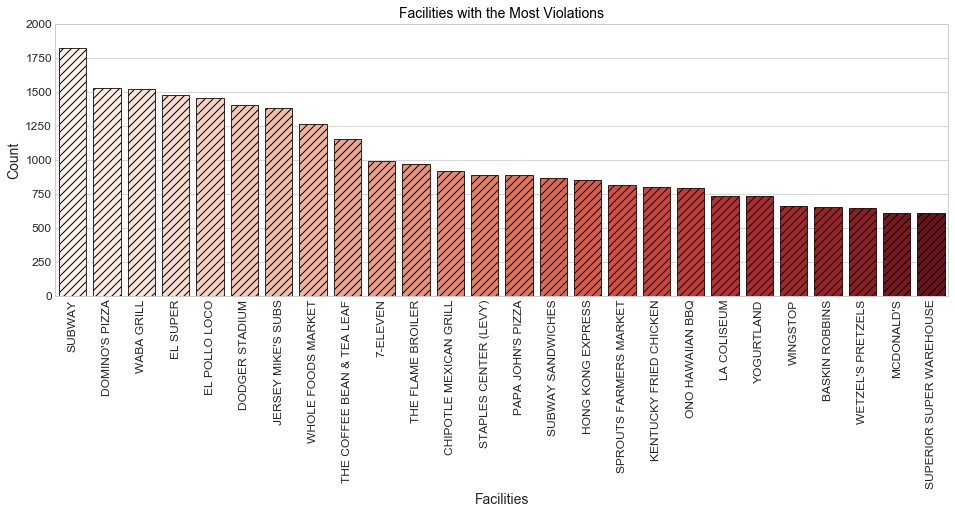

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = sns.barplot(ax = ax, x='Facility Name', y='Count', palette='Reds',
                edgecolor='k',  hatch="///", data= Facilities[Facilities['Count'] >6e2].reset_index())

# _ = Facilities[Facilities['Count'] >6e2].plot.bar(rot=90,ax=ax, legend=False,
#                                               color='#e74c3c', edgecolor='k')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
_ = ax.set_title('Facilities with the Most Violations')
_ = ax.set_ylim([0, 2e3])
_ = ax.set_xlabel('Facilities')
_ = ax.set_ylabel('Count')

We can see that Subway and Dodger Stadium had the most violations among all.

In [20]:
Facilities_Violation  = pd.DataFrame(Data.groupby(['Facility Name','Violation Code'])['Violation Code'].count())
Facilities_Violation.columns = ['Count']
list = Facilities[Facilities['Count'] == Facilities['Count'].max()].index
temp = Facilities_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Facility Name')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F001  F004  F005  F006  F007  F008  F009  F011  F013  F014   
Count              1    12    14    51   161     1     6     3     2   112   

                ...    28    29    30    31    32    33    34    35    36  \
Violation Code  ...  F043  F044  F046  F048  F049  F050  F052  F053  F054   
Count           ...    74   232    87    22    29     4    61    28     4   

                  37  
Violation Code  F055  
Count             15  

[2 rows x 38 columns]

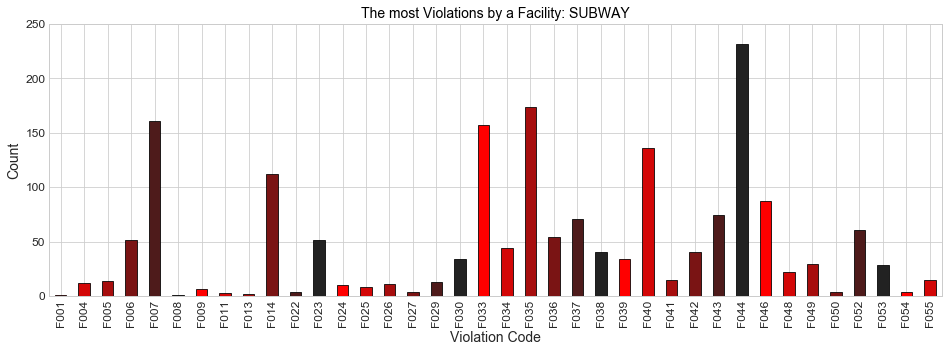

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.dark_palette("red", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by a Facility: %s' % list.tolist()[0])
_ = ax.set_ylim([0, 250])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations by this facility are:

In [22]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Programs with the Most Violations

In [23]:
Programs = pd.DataFrame(Data[Data['Program Name'].isna()==False].groupby('Program Name')['Violation Code'].count())
Programs.columns = ['Count']
Programs.sort_values(by='Count', ascending=False, inplace = True)
Programs[Programs['Count'] >8e2].T

Program Name  SUBWAY  WABA GRILL  EL POLLO LOCO  DOMINO'S PIZZA  \
Count           1934        1557           1496            1408   

Program Name  JERSEY MIKE'S SUBS  JACK IN THE BOX  MCDONALD'S  \
Count                       1263             1182        1118   

Program Name  THE FLAME BROILER  7-ELEVEN  THE COFFEE BEAN & TEA LEAF  \
Count                      1030       993                         941   

Program Name  PAPA JOHN'S PIZZA  SUBWAY SANDWICHES  HONG KONG EXPRESS  \
Count                       897                871                853   

Program Name  CHIPOTLE MEXICAN GRILL  KENTUCKY FRIED CHICKEN  
Count                            850                     802

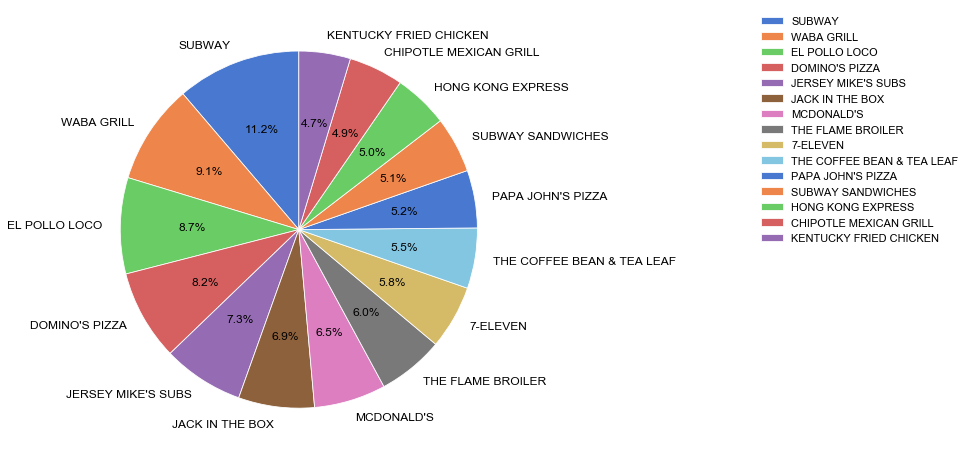

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,10))
_ = Programs[Programs['Count'] >8e2].plot.pie(y='Count', startangle=90, legend=False,label='',ax=ax, autopct='%1.1f%%',
                   colors = sns.color_palette("muted", len(Programs[Programs['Count'] >8e2])), fontsize=12)
_ = ax.legend(bbox_to_anchor=(2, 1), fontsize=11)

In [25]:
Programs_Violation  = pd.DataFrame(Data.groupby(['Program Name','Violation Code'])['Violation Code'].count())
Programs_Violation.columns = ['Count']

list = Programs[Programs['Count'] == Programs['Count'].max()].index
temp = Programs_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Program Name')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F001  F004  F005  F006  F007  F008  F009  F011  F013  F014   
Count              1    12    14    51   172     1     8     4     2   117   

                ...    28    29    30    31    32    33    34    35    36  \
Violation Code  ...  F043  F044  F046  F048  F049  F050  F052  F053  F054   
Count           ...    81   248    91    23    32     4    67    27     4   

                  37  
Violation Code  F055  
Count             15  

[2 rows x 38 columns]

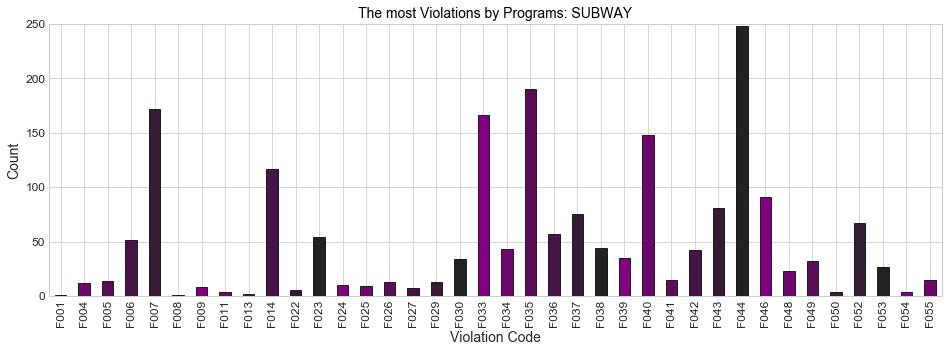

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.dark_palette("purple", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by Programs: %s' % list.tolist()[0])
_ = ax.set_ylim([0, 2.5e2])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

In [27]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Cities with the Most Violations

In [28]:
Facility_Cities = pd.DataFrame(Data[Data['Facility City'].isna()==False].groupby('Facility City')['Violation Code'].count())
Facility_Cities.columns = ['Count']
Facility_Cities=Facility_Cities.sort_values(by='Count', ascending=False)
list = Facility_Cities.index.tolist()
Facility_Cities.index = list
Facility_Cities[Facility_Cities['Count'] >3e3].T

LOS ANGELES  TORRANCE  GLENDALE  NORTH HOLLYWOOD  SANTA MONICA  \
Count       281523     24807     22320            16805         16300   

       VAN NUYS  GARDENA  BURBANK  WHITTIER  INGLEWOOD  ...  BELL GARDENS  \
Count     15041    14603    14533     13485      13043  ...          3560   

       LAWNDALE  NORTH HILLS  LOMITA  WALNUT  SAN DIMAS  CANYON COUNTRY  \
Count      3397         3362    3351    3311       3199            3189   

       LA VERNE  SANTA FE SPRINGS  TEMPLE CITY  
Count      3088              3058         3032  

[1 rows x 84 columns]

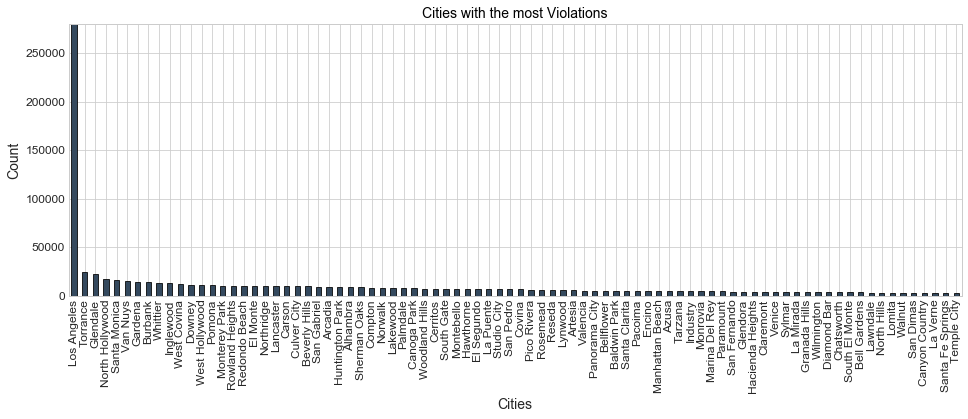

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Facility_Cities[Facility_Cities['Count'] >3e3].plot.bar(ax=ax, legend=False, color='#34495e', edgecolor='k')
_ = ax.set_title('Cities with the most Violations')
_ = ax.set_ylim([0, 2.8e5])
_ = ax.set_xlabel('Cities')
_ = ax.set_ylabel('Count')
_ = ax.set_xticklabels(labels = [x.title() for x in list],rotation=90)

In [30]:
Facility_Cities_Violation  = pd.DataFrame(Data.groupby(['Facility City','Violation Code'])['Violation Code'].count())
Facility_Cities_Violation.columns = ['Count']

list = Facility_Cities[Facility_Cities['Count'] == Facility_Cities['Count'].max()].index
temp = Facility_Cities_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Facility City').set_index(['Violation Code'])
temp.T

Violation Code  F001  F002  F003  F004  F005   F006   F007  F008  F009  F010  \
Count            222     5     5   885  1218  11442  10795  1519  1941     2   

Violation Code  ...  W021  W023  W032  W034  W041  W044  W048  W051  W052  \
Count           ...     2     3     1     1     1     2     1     2     4   

Violation Code  W053  
Count              1  

[1 rows x 79 columns]

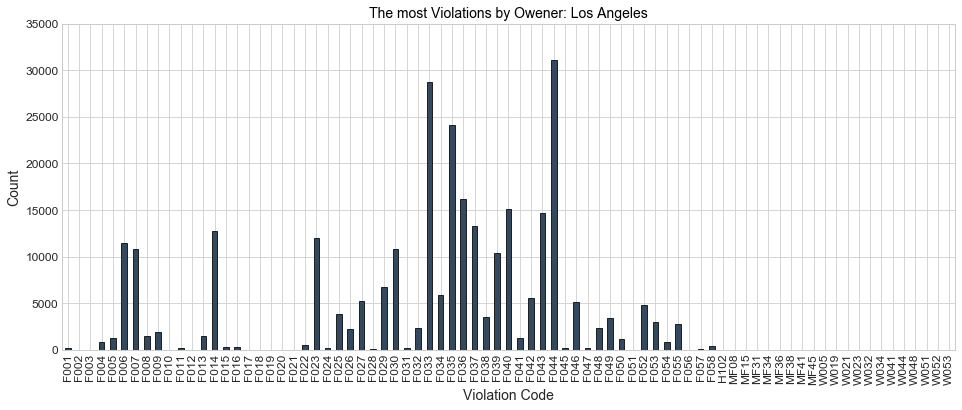

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, legend=False, color='#34495e', edgecolor='k')
_ = ax.set_title('The most Violations by Owener: %s' % list.tolist()[0].title())
_ = ax.set_ylim([0, 3.5e4])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations by this city are:

In [32]:
mylist=temp.sort_values('Count', ascending=False).head(3).index.tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Service Description

In [33]:
Service_Description = pd.DataFrame(Data[Data['Service Description'].isna()==False].groupby('Service Description')['Violation Code'].count())
Service_Description.columns = ['Count']
Service_Description.index = [x.title() for x in Service_Description.index.tolist()]
Service_Description

Count
Owner Initiated Routine Inspect.   16884
Routine Inspection                964238

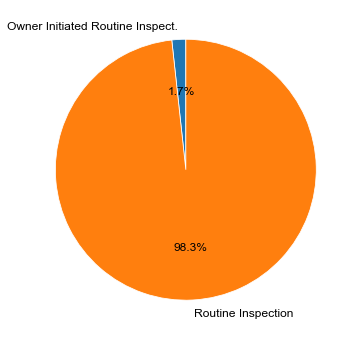

In [34]:
_ = Service_Description.plot.pie(y='Count', startangle=90,  label='', legend=False, figsize=(6,6), autopct='%1.1f%%', fontsize=12)

In [35]:
Service_Description_Violation = pd.DataFrame(Data.groupby(['Service Description','Violation Code'])['Violation Code'].count())
Service_Description_Violation.columns = ['Count']
list = Service_Description[Service_Description['Count'] == Service_Description['Count'].max()].index
temp = Service_Description_Violation.loc[list[0].upper()]
temp.T

Violation Code  F001  F002  F003  F004  F005   F006   F007  F008  F009  F010  \
Count            406    34    34  3428  4671  36158  43042  5587  7426     6   

Violation Code  ...  W034  W035  W040  W041  W044  W048  W050  W051  W052  \
Count           ...     2     1     1     1     2     2     2    11     6   

Violation Code  W053  
Count              1  

[1 rows x 99 columns]

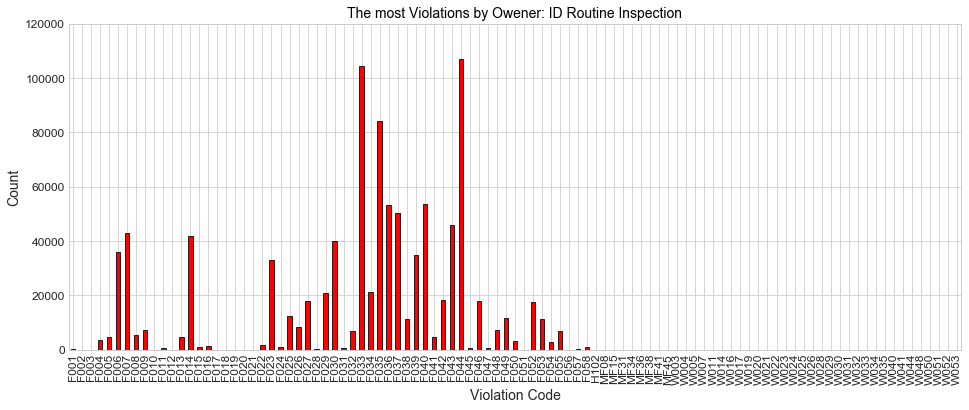

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, legend=False, color=sns.dark_palette("red", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by Owener: ID %s' % list.tolist()[0])
_ = ax.set_ylim([0, 1.2e5])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

In [37]:
mylist=temp.sort_values('Count', ascending=False).head(3).index.tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## The Number of Violations by High-Score and Low-Score Facilities

In [38]:
Score  = pd.DataFrame(Data.groupby(['Score','Facility Name'])['Violation Code'].count())
Score.columns = ['Count']
Score = Score.reset_index()
Score.head(10).style.hide_index()

In [39]:
Score.tail().style.hide_index()

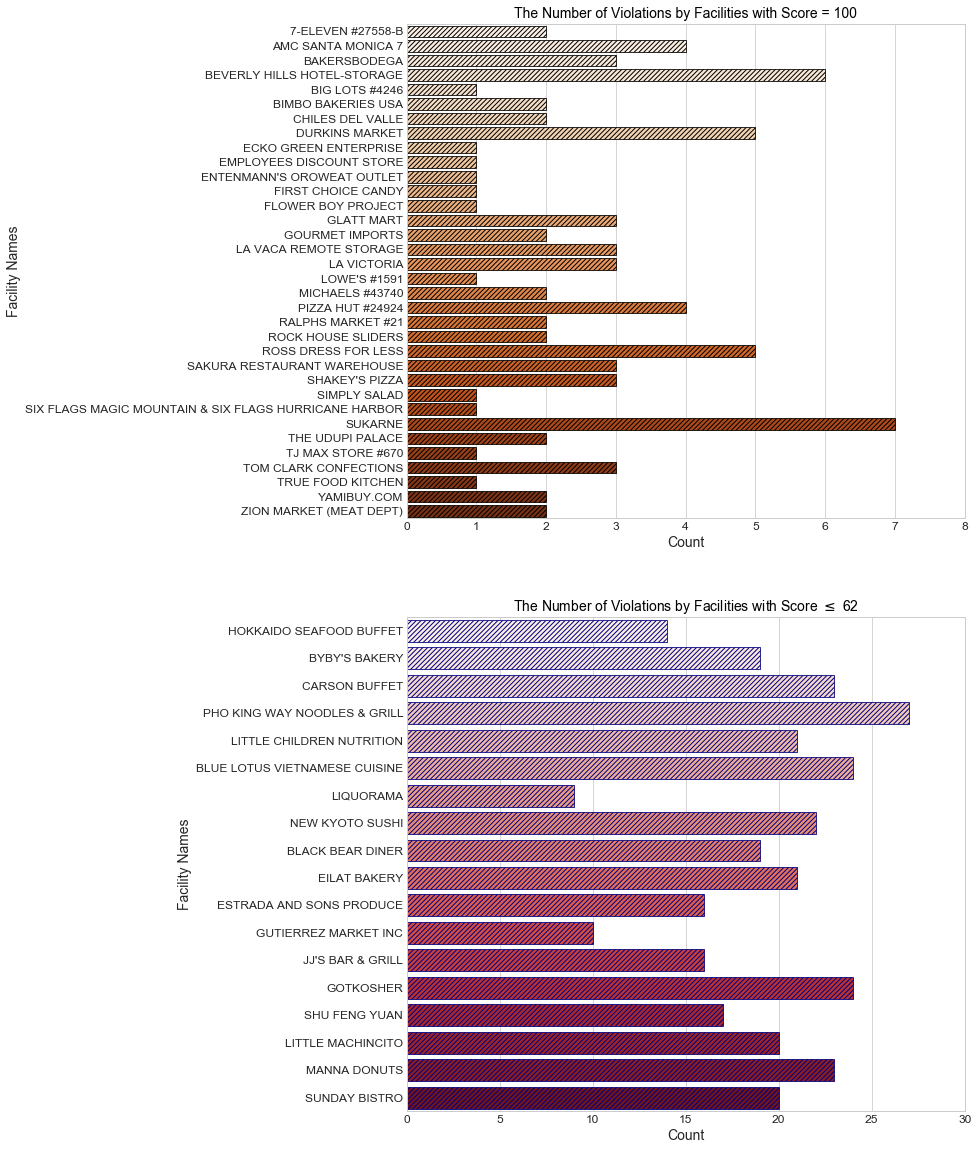

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 20), sharex = False)
_ = sns.barplot(ax = ax[0], y='Facility Name', x='Count', palette='Oranges',
                edgecolor='k',  hatch="/////", data = Score[Score['Score'] == Score['Score'].max()])
_ = ax[0].set_title('The Number of Violations by Facilities with Score = %i' % Score['Score'].max())
_ = ax[0].set_xlim([0, 8])
_ = ax[0].set_ylabel('Facility Names')
_ = ax[0].set_xlabel('Count')

_ = sns.barplot(ax = ax[1], y='Facility Name', x='Count', palette='Reds',
                edgecolor='Navy',  hatch="/////", data= Score[Score['Score'] <= Score['Score'].min()+10])
_ = ax[1].set_title('The Number of Violations by Facilities with Score $\leq$ %i' % (Score['Score'].min()+10))
_ = ax[1].set_xlim([0, 30])
_ = ax[1].set_ylabel('Facility Names')
_ = ax[1].set_xlabel('Count')

# plt.subplots_adjust(hspace=0.2)

## The Number of Violations by Each Grades

In [41]:
Grade  = pd.DataFrame(Data.groupby(['Grade'])['Violation Code'].count())
Grade.columns = ['Count']
Grade = Grade.reset_index()
Grade.head().style.hide_index()

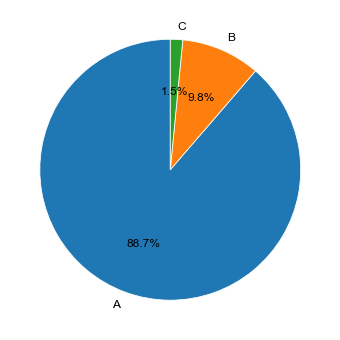

In [42]:
_ = Grade.plot.pie(x='Grade', y='Count', labels=Grade.Grade, startangle=90, legend=False, label='',
                   figsize=(6,6), autopct='%1.1f%%', fontsize=12)

## Violation Status

In [43]:
Violation_Status = pd.DataFrame(Data.groupby('Violation Status')['Violation Code'].count())
Violation_Status.columns = ['Count']
Violation_Status.T

Violation Status  HOUSING NON-CRITICAL  OUT OF COMPLIANCE  VIOLATION
Count                                1             981179          4

## The Most Described Violations

In [44]:
Violation_Description = pd.DataFrame(Data.groupby('Violation Description')['Violation Code'].count())
Violation_Description.columns = ['Count']
Violation_Description[Violation_Description['Count'] > 5e3] 

Count
Violation Description                                     
# 01a. Demonstration of knowledge                     7552
# 01b. Food safety certification                     17653
# 06. Adequate handwashing facilities supplied ...   36534
# 07. Proper hot and cold holding temperatures       44088
# 08. Time as a public health control; procedur...    5725
# 09. Proper cooling methods                          7660
# 14. Food contact surfaces: clean and sanitized     42612
# 21a. Hot Water Available                           11448
# 23. No rodents, insects, birds, or animals         33811
# 25. Personal cleanliness and hair restraints       12736
# 26. Approved thawing methods used, frozen foo...    8377
# 27. Food separated and protected                   18392
# 29. Toxic substances properly identified, sto...   21365
# 30. Food properly stored; food storage contai...   40834
# 32. Food properly labeled & honestly presented      6961
# 33. Nonfood-contact surfaces clean and in goo...  105962
# 34. Warewashing facilities: Adequate, maintai...   21602
# 35. Equipment/Utensils - approved; installed;...   85802
# 36. Equipment, utensils and linens: storage a...   54239
# 37. Adequate ventilation and lighting; design...   51273
# 38. Thermometers provided and accurate             11454
# 39. Wiping cloths: properly used and stored        35332
# 40. Plumbing: Plumbing in good repair, proper...   54399
# 42. Toilet facilities: properly constructed, ...   18342
# 43. Premises; personal/cleaning items; vermin...   46794
# 44. Floors, walls and ceilings: properly buil...  108689
# 46. Signs posted; last inspection report avai...   18238
# 47. Permits Available                               7249
# 50. Impoundment of unsanitary equipment or food    11854

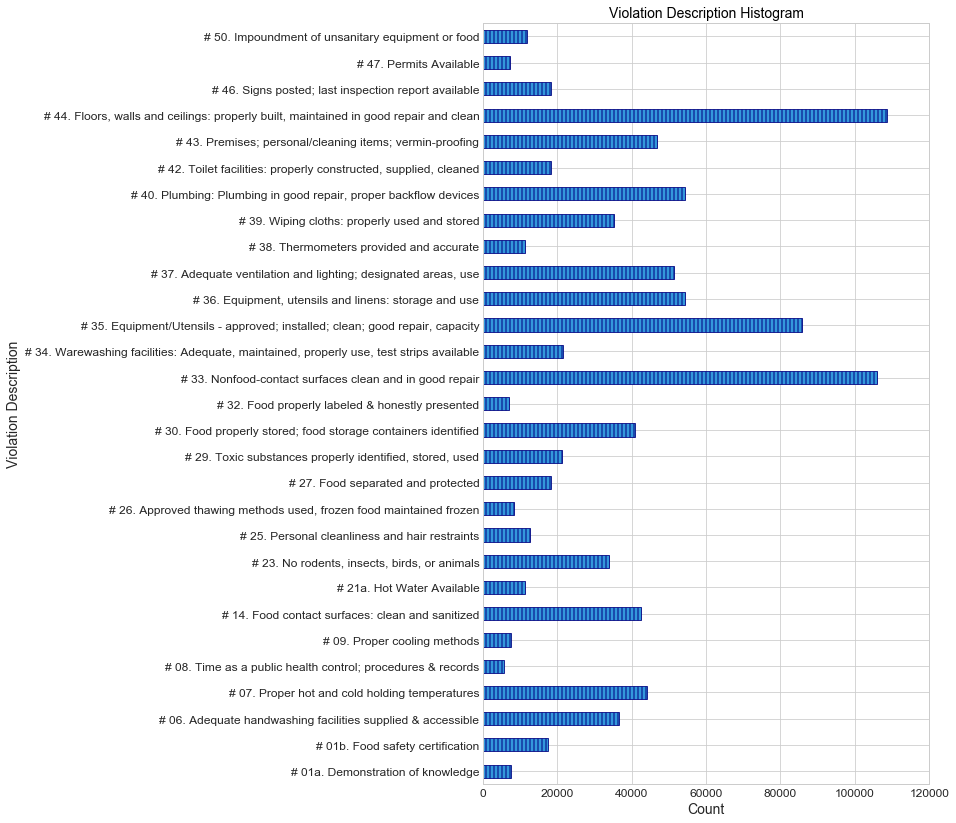

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 14), sharex=False)
_ = Violation_Description[Violation_Description['Count'] > 5e3].plot.barh(rot=0, legend=False,
                                                         ax=ax, color='#3498db', edgecolor='Navy', hatch = '|||')
_ = ax.set_title('Violation Description Histogram')
_ = ax.set_xlim([0, 1.2e5])
_ = ax.set_xlabel('Count')
_ = ax.set_ylabel('Violation Description')

## Program Element Description

In [46]:
PE_Description_Type = pd.DataFrame(Data.groupby('PE_Type')['Violation Code'].count())
PE_Description_Type.columns = ['Count']
PE_Description_Type.T

PE_Type  Caterer  Food Market Retail  Food Market Wholesale  \
Count        167              147502                      3   

PE_Type  Food Processing Wholesale  Food Vehicle Commissary  Food Warehouse  \
Count                           56                        5               7   

PE_Type  Interim Housing FF  LIC HTH Care Food FAC  Private School Cafeteria  \
Count                   294                    184                        44   

PE_Type  Restaurant  Swap Meet Prepackaged Food Stand  
Count        832859                                 1

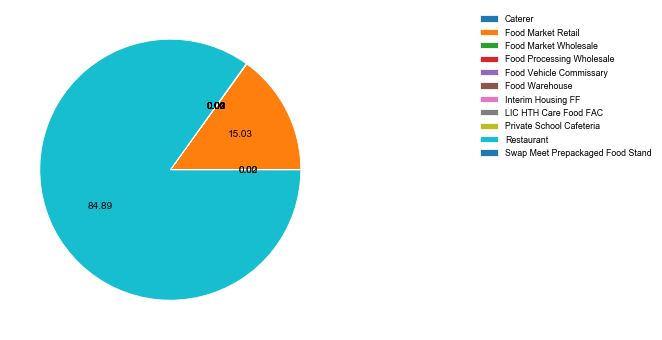

In [47]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
_ = patches, text, _ = ax.pie(PE_Description_Type['Count'].values, autopct='%.2f')
_ = ax.legend(patches, labels=PE_Description_Type.index, bbox_to_anchor=(2, 1))

In [48]:
PE_Description_Risk = pd.DataFrame(Data.groupby('PE_Risk')['Violation Code'].count())
PE_Description_Risk.columns = ['Count']
PE_Description_Risk.T

PE_Risk  High Risk  Low Risk  Moderate Risk
Count       676688    105299         198558

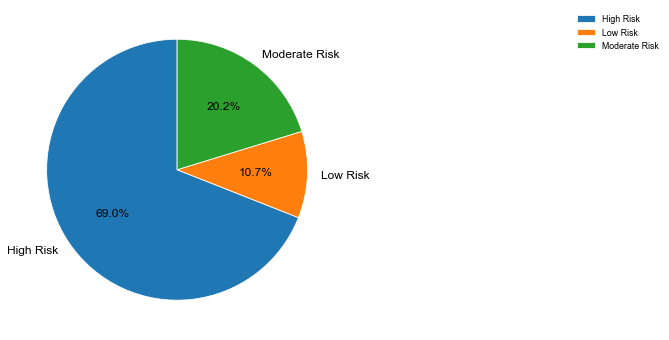

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharex=False)
_ = PE_Description_Risk.plot.pie(y='Count', startangle=90, legend=False,
                                 label='',ax=ax, autopct='%1.1f%%', fontsize=12)
_ = ax.legend(bbox_to_anchor=(2, 1))

In [50]:
PE_Description_Seats = pd.DataFrame(Data.groupby('PE_Seats')['Violation Code'].count())
PE_Description_Seats.columns = ['Count']
PE_Description_Seats.T

PE_Seats  0-10 SQ. FT.  0-1999 SQ. FT.  0-30 SQ. FT.  0-999 SQ. FT.  \
Count                5               3        382524             76   

PE_Seats  1-1999 SQ. FT.  1-4999 SQ. FT.  1000-1999 SQ. FT.  10000+ SQ. FT.  \
Count             102860               7                 91              15   

PE_Seats  151+ SQ. FT.  2000+ SQ. FT.  2000-3999 SQ. FT.  2000-4999 SQ. FT.  \
Count            62220          44863                 15                 85   

PE_Seats  2000-5999 SQ. FT.  31-60 SQ. FT.  4000-9999 SQ. FT.  6000+ SQ. FT.  \
Count                    33         217638                151             11   

PE_Seats  Other  
Count       110

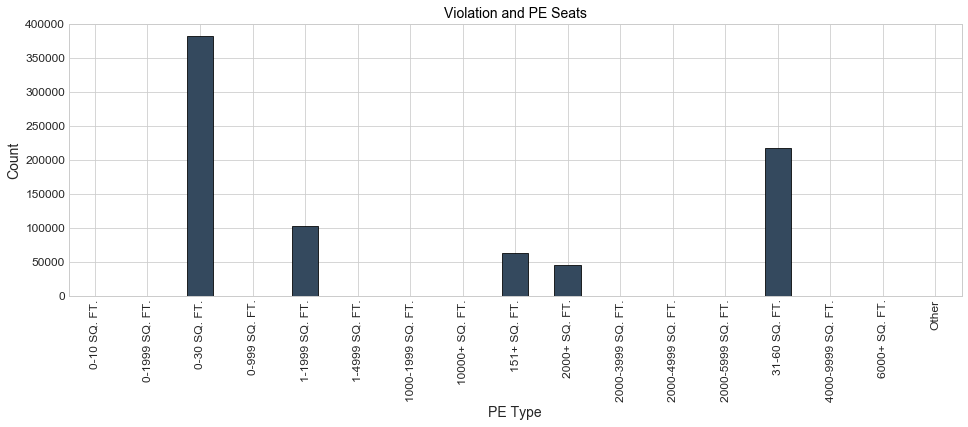

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = PE_Description_Seats.plot.bar(rot=90, legend=False,ax=ax, color="#34495e", edgecolor="k")
_ = ax.set_title('Violation and PE Seats')
_ = ax.set_ylim([0, 4e5])
_ = ax.set_xlabel('PE Type')
_ = ax.set_ylabel('Count')

## A Deeper look into Violation by each Facility

We can create a new data frame that represents all the different violations and the total number of each violation.

In [52]:
Violations_by_Facility  = pd.DataFrame(Data.groupby(['Facility ID','Violation Code'])['Violation Code'].count())
Violations_by_Facility.columns = ['Count']
Violations_by_Facility 

Count
Facility ID Violation Code       
FA0000968   F006                1
            F022                1
            F023                1
            F029                2
            F033                1
...                           ...
FA0278987   F033                1
            F037                1
            F040                1
            F044                1
            F047                1

[494118 rows x 1 columns]

Furthermore, we can create a matrix for violations.

In [53]:
Violations_matrix = Violations_by_Facility['Count'].unstack(0).T
Violations_matrix.fillna(0, inplace=True)
Violations_matrix.reset_index(inplace=True)
Violations_matrix.iloc[:,1:] = Violations_matrix.iloc[:,1:].astype('int32')
Violations_matrix.head()

Violation Code Facility ID  F001  F002  F003  F004  F005  F006  F007  F008  \
0                FA0000968     0     0     0     0     0     1     0     0   
1                FA0000989     0     0     0     0     0     1     0     0   
2                FA0000999     0     0     0     0     0     1     0     0   
3                FA0001114     0     0     0     0     0     0     1     0   
4                FA0001155     0     0     0     0     0     1     0     0   

Violation Code  F009  ...  W034  W035  W040  W041  W044  W048  W050  W051  \
0                  0  ...     0     0     0     0     0     0     0     0   
1                  0  ...     0     0     0     0     0     0     0     0   
2                  0  ...     0     0     0     0     0     0     0     0   
3                  0  ...     0     0     0     0     0     0     0     0   
4                  0  ...     0     0     0     0     0     0     0     0   

Violation Code  W052  W053  
0                  0     0  
1                  0     0  
2                  0     0  
3                  0     0  
4                  0     0  

[5 rows x 100 columns]

#### Saving

In [54]:
Violations_matrix.to_csv('Data/LA/Violations_matrix_df.csv',index=False)

Now, we would like to know which one of these violation codes are the most correlated ones.

In [55]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=False, square=True, 
                cmap =sns.color_palette("RdYlGn", n_colors=10), linewidths = 0.01, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()

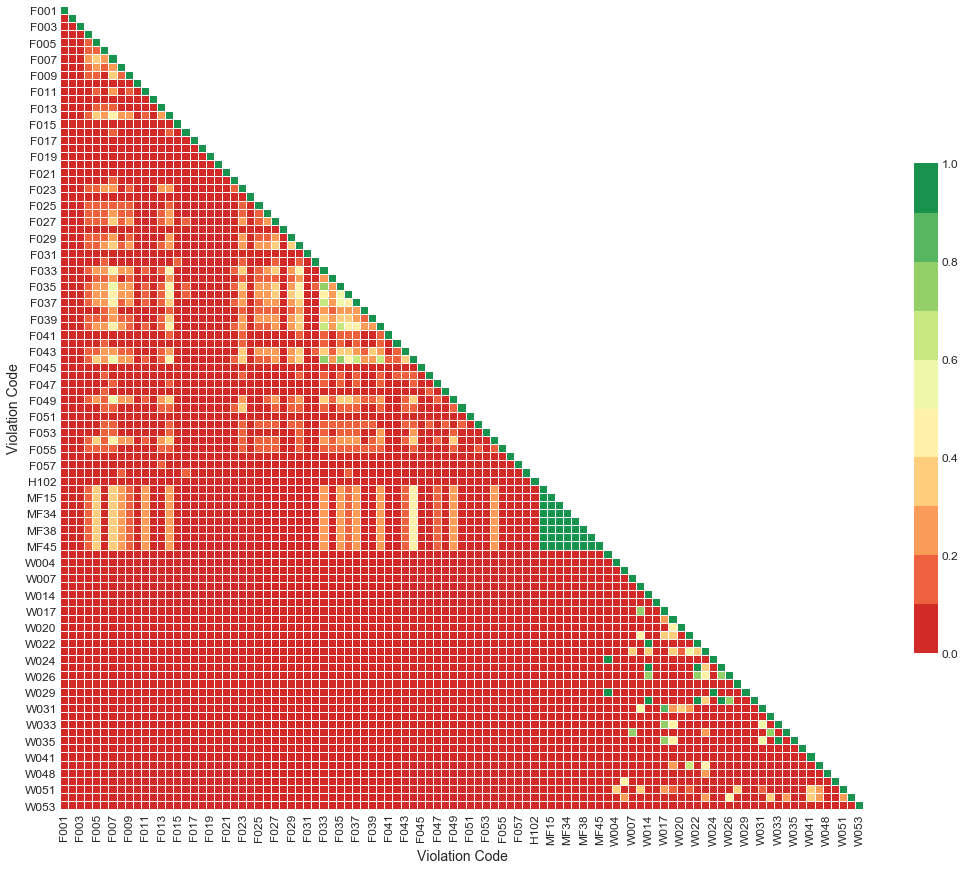

In [56]:
Correlation_Plot(Violations_matrix, 18)

Let's consider those with a correlation of at least 0.6.

In [57]:
threshold = 0.6
Correlation_Matrix = Violations_matrix.corr()
mylist=Correlation_Matrix.index.tolist()
new_list=[]
for i in mylist:
    for j in mylist:
        if (Correlation_Matrix.loc[[i],[j]].values[0,0]>=threshold) & (Correlation_Matrix.loc[[i],[j]].values[0,0]!=1):
            new_list.append(i)
            new_list.append(j)

In [58]:
del list
mylist=list(set(new_list))

Therefore,

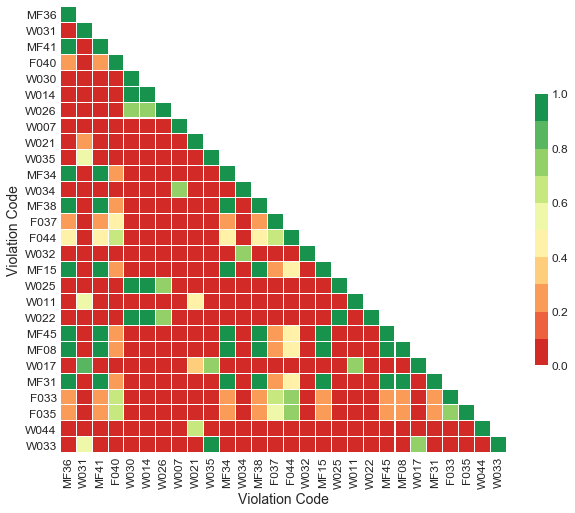

In [59]:
Correlation_Plot(Violations_matrix[mylist], 10)

The most correlated codes are:

In [60]:
print(mylist)

['MF36', 'W031', 'MF41', 'F040', 'W030', 'W014', 'W026', 'W007', 'W021', 'W035', 'MF34', 'W034', 'MF38', 'F037', 'F044', 'W032', 'MF15', 'W025', 'W011', 'W022', 'MF45', 'MF08', 'W017', 'MF31', 'F033', 'F035', 'W044', 'W033']


***